# Chapter 3: Probability and Distributions

## 3.4 Binomial Distribution


**(a) Probability that exactly 5 customers will return the items.**

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from scipy import stats

stats.binom.pmf( 5, 20, 0.1 )

0.031921361119954424

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

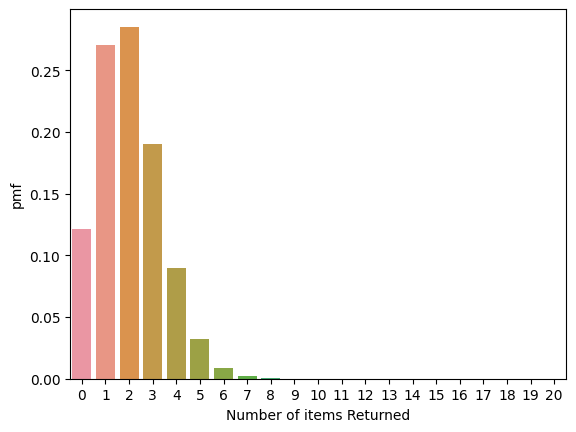

In [4]:
# range(0,21) returns all values from 0 to 20 (excluding 21)
pmf_df = pd.DataFrame( { 'success': range(0,21),
                         'pmf': list(stats.binom.pmf( range(0,21),
                                                     20,
                                                     0.1 ) ) } )

sn.barplot( x = pmf_df.success, y = pmf_df.pmf )
plt.ylabel('pmf')
plt.xlabel('Number of items Returned');

**(b) Probability that a maximum of 5 customers will return the items.**

In [5]:
stats.binom.cdf( 5, 20, 0.1 )

0.988746865835491

**(c) Probability that more than 5 customers will return the items purchased by them.**

In [6]:
1 - stats.binom.cdf( 5, 20, 0.1 )

0.011253134164509015

**(d) Average number of customers who are likely to return the items and the variance and the standard deviation of the number of returns.**

In [7]:
mean, var = stats.binom.stats(20, 0.1)
print( "Average: ", mean , " Variance:", var)

Average:  2.0  Variance: 1.8


## 3.5 Poisson Distribution

### Example of Poisson distribution
**(a) Calculate the probability that the number of calls will be maximum 5.**

In [8]:
stats.poisson.cdf(5, 10)

0.06708596287903189

**(b) Calculate the probability that the number of calls over a 3-hour period will exceed 30.**

In [9]:
1 - stats.poisson.cdf(30, 30)

0.45164848742208863

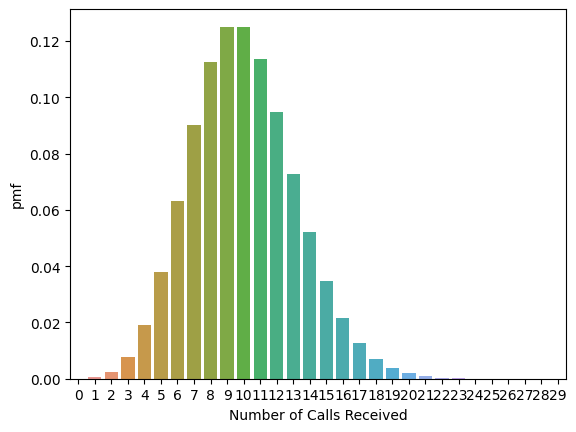

In [10]:
pmf_df = pd.DataFrame( { 'success': range(0,30),
                         'pmf': list(stats.poisson.pmf( range(0,30),
                                                       10) ) } )

sn.barplot( x = pmf_df.success, y = pmf_df.pmf );
plt.xlabel('Number of Calls Received');

## 3.6 Exponential Distribution

### Example of Exponential Distribution

(a) Calculate the probability that the system will fail before 1000 hours.

In [11]:
stats.expon.cdf(1000,
                loc = 1/1000,
                scale = 1000)

0.6321201909489326

(b) Calculate the probability that it will not fail up to 2000 hours.

In [12]:
1 - stats.expon.cdf(2000,
                loc = 1/1000,
                scale = 1000)

0.13533541857196352

(c) Calculate the time by which 10% of the system will fail (that is, calculate  P10  life).

In [13]:
stats.expon.ppf(.1,
                loc = 1/1000,
                scale = 1000)

105.36151565782632

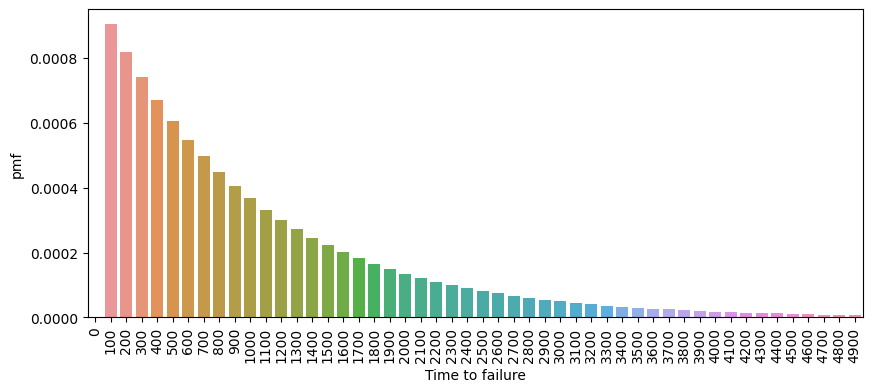

In [14]:
pmf_df = pd.DataFrame( { 'success': range(0,5000, 100),
                         'pmf':
                        list(stats.expon.pdf( range(0,5000, 100),
                                              loc = 1/1000,
                                              scale = 1000 ) ) } )

plt.figure( figsize=(10,4))
sn.barplot( x = pmf_df.success, y = pmf_df.pmf )
plt.xticks(rotation=90);
plt.xlabel('Time to failure');

## 3.7 Normal Distribution

In [16]:
import pandas as pd
import numpy as np
import warnings

# Setting precision level to 4 to show only upto 4 decimal points
pd.option_context('display.precision', 2)

beml_df = pd.read_csv( '/content/BEML.csv' )
beml_df[0:5]

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
1,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
3,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
4,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42


In [17]:
glaxo_df = pd.read_csv( 'GLAXO.csv' )
glaxo_df[0:5]

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11


In [18]:
beml_df = beml_df[['Date', 'Close']]
glaxo_df = glaxo_df[['Date', 'Close']]

In [19]:
glaxo_df = glaxo_df.set_index(pd.DatetimeIndex(glaxo_df['Date']) )
beml_df = beml_df.set_index(pd.DatetimeIndex(beml_df['Date']) )

In [20]:
glaxo_df.head(5)

,Date,Close
Date,,
2010-01-04,2010-01-04,1625.65
2010-01-05,2010-01-05,1616.80
2010-01-06,2010-01-06,1638.50
2010-01-07,2010-01-07,1648.70
2010-01-08,2010-01-08,1639.80


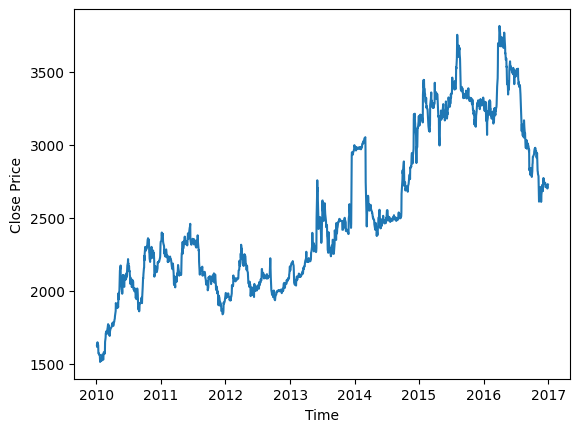

In [21]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

plt.plot( glaxo_df.Close );
plt.xlabel( 'Time' );
plt.ylabel( 'Close Price' );

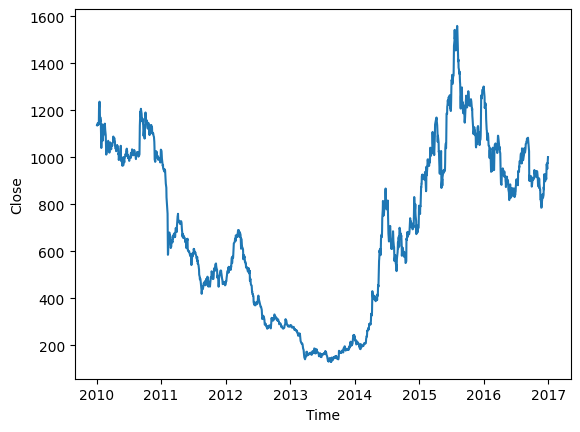

In [22]:
plt.plot( beml_df.Close );
plt.xlabel( 'Time' );
plt.ylabel( 'Close' );

In [23]:
glaxo_df['gain'] = glaxo_df.Close.pct_change( periods = 1 )
beml_df['gain'] = beml_df.Close.pct_change( periods = 1 )
glaxo_df.head( 5 )

,Date,Close,gain
Date,,,
2010-01-04,2010-01-04,1625.65,NaN
2010-01-05,2010-01-05,1616.80,-0.005444
2010-01-06,2010-01-06,1638.50,0.013422
2010-01-07,2010-01-07,1648.70,0.006225
2010-01-08,2010-01-08,1639.80,-0.005398


In [24]:
glaxo_df = glaxo_df.dropna()
beml_df = beml_df.dropna()

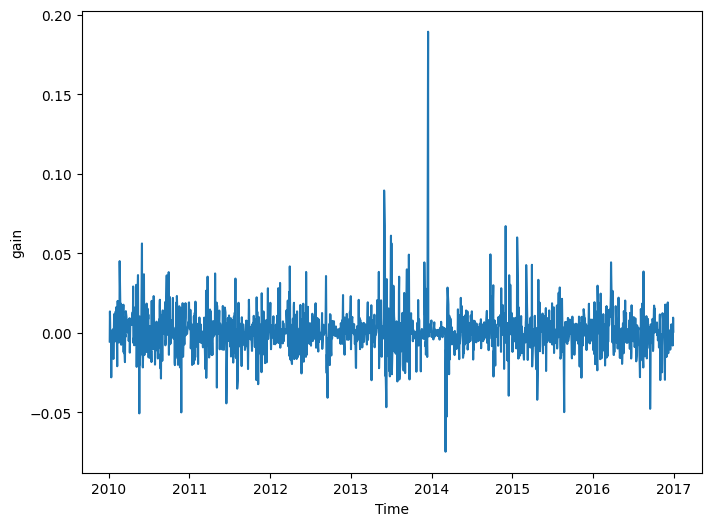

In [25]:
plt.figure( figsize = ( 8, 6 ));
plt.plot( glaxo_df.index, glaxo_df.gain  );
plt.xlabel( 'Time' );
plt.ylabel( 'gain' );

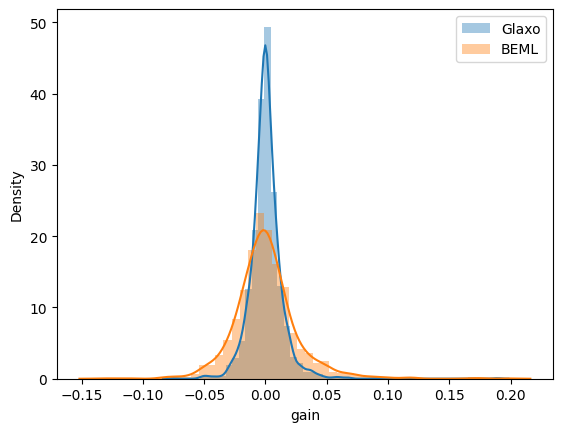

In [26]:
sn.distplot( glaxo_df.gain, label = 'Glaxo'  );
sn.distplot( beml_df.gain, label = 'BEML'  );
plt.xlabel( 'gain' );
plt.ylabel( 'Density' );
plt.legend();

### 3.7.2 Mean and Variance

In [27]:
print( "Daily gain of Glaxo")
print("---------------------")
print( "Mean: ", round(glaxo_df.gain.mean(), 4) )
print( "Standard Deviation: ", round(glaxo_df.gain.std(), 4) )

Daily gain of Glaxo
---------------------
Mean:  0.0004
Standard Deviation:  0.0134


In [28]:
print( "Daily gain of BEML")
print("---------------------")
print( "Mean: ", round(beml_df.gain.mean(), 4) )
print( "Standard Deviation: ", round(beml_df.gain.std(), 4) )

Daily gain of BEML
---------------------
Mean:  0.0003
Standard Deviation:  0.0264


In [29]:
beml_df.gain.describe()

count    1738.000000
mean        0.000271
std         0.026431
min        -0.133940
25%        -0.013736
50%        -0.001541
75%         0.011985
max         0.198329
Name: gain, dtype: float64

### 3.7.3 Confidence Interval

In [30]:
from scipy import stats

glaxo_df_ci = stats.norm.interval(0.95,
                                  loc = glaxo_df.gain.mean(),
                                  scale = glaxo_df.gain.std())

print( "Gain at 95% confidence interval is:", np.round(glaxo_df_ci, 4) )

Gain at 95% confidence interval is: [-0.0258  0.0266]


In [31]:
beml_df_ci = stats.norm.interval( 0.95,
                loc=beml_df.gain.mean(),
                scale=beml_df.gain.std())

print( "Gain at 95% confidence interval is:", np.round(beml_df_ci, 4) )

Gain at 95% confidence interval is: [-0.0515  0.0521]


### 3.7.4 Cumulative Probability Distribution

In [32]:
print( "Probability of making 2% gain or higher in Glaxo: ")
stats.norm.cdf( -0.02,
             loc=glaxo_df.gain.mean(),
             scale=glaxo_df.gain.std())

Probability of making 2% gain or higher in Glaxo: 


0.06352488667177401

In [33]:
print( "Probability of making 2% gain or higher in BEML: ")
stats.norm.cdf( -0.02,
             loc=beml_df.gain.mean(),
             scale=beml_df.gain.std())

Probability of making 2% gain or higher in BEML: 


0.22155987503755292

In [34]:
print( "Probability of making 2% gain or higher in Glaxo: ",
            1 - stats.norm.cdf( 0.02,
             loc=glaxo_df.gain.mean(),
             scale=glaxo_df.gain.std()) )

print( "Probability of making 2% gain or higher in BEML: ",
            1 - stats.norm.cdf( 0.02,
             loc=beml_df.gain.mean(),
             scale=beml_df.gain.std()) )

Probability of making 2% gain or higher in Glaxo:  0.07104511457618568
Probability of making 2% gain or higher in BEML:  0.22769829484075355


## 3.9 Hypothesis Test

### 3.9.1 z-test

In [36]:
passport_df = pd.read_csv('/content/passport.csv')

passport_df.head(5)

,processing_time
0,16.0
1,16.0
2,30.0
3,37.0
4,25.0


In [37]:
print(list(passport_df.processing_time))

[16.0, 16.0, 30.0, 37.0, 25.0, 22.0, 19.0, 35.0, 27.0, 32.0, 34.0, 28.0, 24.0, 35.0, 24.0, 21.0, 32.0, 29.0, 24.0, 35.0, 28.0, 29.0, 18.0, 31.0, 28.0, 33.0, 32.0, 24.0, 25.0, 22.0, 21.0, 27.0, 41.0, 23.0, 23.0, 16.0, 24.0, 38.0, 26.0, 28.0]


In [38]:
import math

def z_test( pop_mean, pop_var, sample ):
    z_score = (sample.mean() - pop_mean)/(pop_var/math.sqrt(len(sample)))
    return z_score, stats.norm.cdf(z_score)

In [39]:
z_test( 30, 12.5, passport_df.processing_time )

(-1.4925950555994747, 0.06777160919961511)

### 3.9.2 One sample t-test

In [40]:
bollywood_movies_df = pd.read_csv( '/content/bollywoodmovies.csv' )

In [41]:
bollywood_movies_df.head(5)

,production_cost
0,601
1,627
2,330
3,364
4,562


In [42]:
print(list(bollywood_movies_df.production_cost))

[601, 627, 330, 364, 562, 353, 583, 254, 528, 470, 125, 60, 101, 110, 60, 252, 281, 227, 484, 402, 408, 601, 593, 729, 402, 530, 708, 599, 439, 762, 292, 636, 444, 286, 636, 667, 252, 335, 457, 632]


In [43]:
stats.ttest_1samp( bollywood_movies_df.production_cost, 500 )

TtestResult(statistic=-2.2845532872667547, pvalue=0.027862556406761777, df=39)

### 3.9.3 Two sample t-test

In [44]:
healthdrink_yes_df = pd.read_excel( '/content/healthdrink.xlsx', 'healthdrink_yes')

In [45]:
healthdrink_yes_df.head(5)

,height_increase
0,8.6
1,5.8
2,10.2
3,8.5
4,6.8


In [46]:
healthdrink_yes_df.columns

Index(['height_increase'], dtype='object')

In [47]:
healthdrink_no_df = pd.read_excel( 'healthdrink.xlsx', 'healthdrink_no')
healthdrink_no_df.head(5)

,height_increase
0,5.3
1,9.0
2,5.7
3,5.5
4,5.4


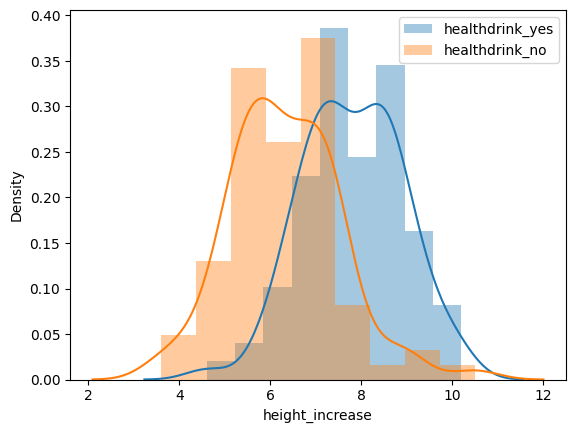

In [48]:
sn.distplot( healthdrink_yes_df['height_increase'], label ='healthdrink_yes' )
sn.distplot( healthdrink_no_df['height_increase'], label ='healthdrink_no' )
plt.legend();

In [49]:
stats.ttest_ind(healthdrink_yes_df['height_increase'],
                healthdrink_no_df['height_increase'])

TtestResult(statistic=8.131675069083359, pvalue=1.197698592263946e-13, df=157.0)

### 3.9.4 Paired sample t-test

In [51]:
breakups_df = pd.read_csv( '/content/breakups.csv' )
breakups_df.head(5)

,Before_Breakup,After_Breakup
0,470,408
1,354,439
2,496,321
3,351,437
4,349,335


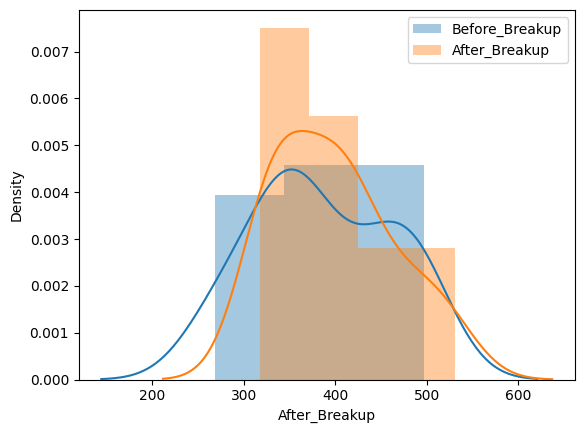

In [52]:
sn.distplot( breakups_df['Before_Breakup'], label ='Before_Breakup' )
sn.distplot( breakups_df['After_Breakup'], label ='After_Breakup' )
plt.legend();

In [53]:
stats.ttest_rel( breakups_df['Before_Breakup'], breakups_df['After_Breakup'] )

TtestResult(statistic=-0.5375404241815106, pvalue=0.5971346738292477, df=19)

### 3.9.5 Chi-squre Test of Independence

In [54]:
## Observed frequencies
f_obs = [190, 185, 90, 35]
## Expected frquencies from the percentages expected
f_exp = [500*0.35, 500*0.4, 500*.2, 500*0.05]
print( f_exp )

[175.0, 200.0, 100.0, 25.0]


In [55]:
stats.chisquare( f_obs, f_exp )

Power_divergenceResult(statistic=7.410714285714286, pvalue=0.05989751420084909)

## 3.10 Analysis of Variance (ANOVA)

### 3.10.1 Example of One-Way ANOVA

In [56]:
onestop_df = pd.read_csv('/content/onestop.csv')
onestop_df.head(5)

,discount_0,discount_10,discount_20
0,39,34,42
1,32,41,43
2,25,45,44
3,25,39,46
4,37,38,41


Let's visualize the distribution of group using distribution plot.

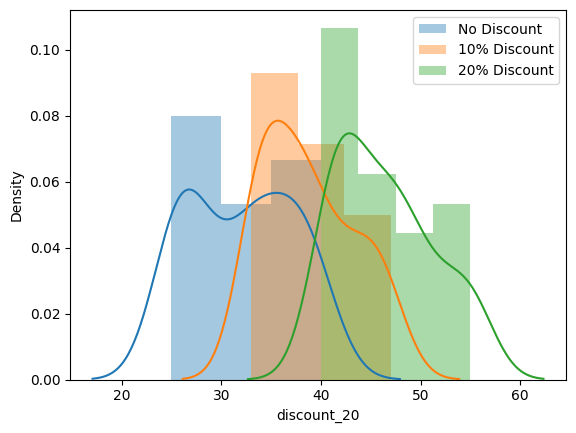

In [57]:
sn.distplot(onestop_df['discount_0'], label = 'No Discount')
sn.distplot(onestop_df['discount_10'], label = '10% Discount')
sn.distplot(onestop_df['discount_20'], label = '20% Discount')
plt.legend();

In [58]:
from scipy.stats import f_oneway

f_oneway( onestop_df['discount_0'],
          onestop_df['discount_10'],
          onestop_df['discount_20'])

F_onewayResult(statistic=65.86986401283694, pvalue=3.821500669725641e-18)